In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-c7z99mff because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Lesson 10: SVD And Applications

Recall the Singular Value Decomposition (SVD) for a non-square matrix ${\bf A}$ with dimensions $m \times n$:

$$ {\bf A} = {\bf U\Sigma V}^{T} = \begin{bmatrix}\vert & & \vert & & \vert \\ \vert & & \vert & & \vert \\ {\bf u}_1 & \cdots & {\bf u}_n & \cdots & {\bf u}_m\\ \vert & & \vert & & \vert \\\vert & & \vert & & \vert \end{bmatrix} \begin{bmatrix} \sigma_1 & & \\ & \ddots & \\ & & \sigma_n \\ &  \vdots &  \\ -& 0& -\end{bmatrix} \begin{bmatrix} - & {\bf v}_1^T & - \\ & \vdots & \\ - & {\bf v}_n^T & - \end{bmatrix} $$

where the example above illustrates a matrix where $m > n$. ${\bf U}$ is an $m \times m$ orthogonal matrix whose columns are the left singular vectors, ${\bf \Sigma}$ is an $m\times n$ diagonal matrix whose entries are the singular values, and ${\bf V}$ is an $n \times n$ orthogonal matrix whose columns are the right singular vectors.

We will be using the built-in SVD function [numpy.linalg.svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html):
```python
U, S, Vt = la.svd(A)
```
Note that the matrix containing the right singular vectors is returned as transpose format so that the rows are the right singular vectors.

Compute the SVD of the matrix A:

In [2]:
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])

In [3]:
U, S, Vt = la.svd(A)

Check the shape (dimensions) of the matrices:

In [4]:
print(U.shape)
print(S.shape)
print(Vt.shape)

(3, 3)
(2,)
(2, 2)


And take a look at each one of the matrices:

In [5]:
print(U)
print(S)
print(Vt)

[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


Note that the diagonal matrix ${\bf \Sigma}$ is returned as a 1d numpy array, including only the $n$ diagonal entries (instead of a matrix with shape $m \times n$). The shape of the 1d numpy array is `(k,)`, where `k = min(m,n)`.

In the above example, ${\bf \Sigma}$ has shape $(3,2)$, however `numpy.linalg.svd` returns a 1d array of shape $(2,)$.

You can reconstruct the matrix ${\bf \Sigma}$ if needed:

In [6]:
m = 3
n = 2
Sigma = np.zeros((m,n))
np.fill_diagonal(Sigma, S)
Sigma

array([[9.52551809, 0.        ],
       [0.        , 0.51430058],
       [0.        , 0.        ]])

And you can use SVD to reconstruct the matrix:

In [7]:
U @ Sigma @ Vt

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

When dealing with non-square matrices, it is often better to use the SVD in its reduced form:

$$ {\bf A} = {\bf U_R\Sigma_R V}^{T} =  \begin{bmatrix}\vert & & \vert \\  \vert & & \vert \\ {\bf u}_1 & \cdots & {\bf u}_n \\ \vert & & \vert \\ \vert & & \vert \end{bmatrix} \begin{bmatrix} \sigma_1 & & \\ & \ddots & \\ & & \sigma_n \end{bmatrix} \begin{bmatrix} - & {\bf v}_1^T & - \\ & \vdots & \\ - & {\bf v}_n^T & - \end{bmatrix} $$

where ${\bf U}_R$ is an $m \times n$ matrix, and ${\bf \Sigma}_R$ is an $n \times n$ diagonal matrix.

To accomplish this using the SVD built-in function, we use the argument `full_matrices=False`.

In [8]:
UR, SR, VRt = la.svd(A, full_matrices=False)
print(UR.shape)
print(SR.shape)
print(VRt.shape)

(3, 2)
(2,)
(2, 2)


Reconstruct the matrix A using the reduced SVD. Since ${\bf \Sigma}_R$ is square, we may use [numpy.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) to reconstruct it from the output of the SVD function.

In [9]:
UR @ np.diag(SR) @ VRt

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

## 1) Image Compression

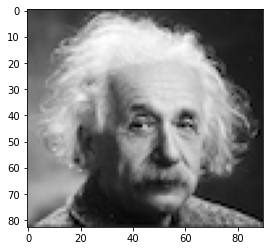

In [10]:
einstein = plt.imread("einstein.png")[:,:,0]
plt.imshow(einstein, cmap="gray")

Now that you know how to obtain the singular value decomposition of a matrix, let's try to better understand the meaning of each of the components. 

We will continue to use our notation where ${\bf u}_i$ corresponds to the $i^{th}$ column of ${\bf U}$, and ${\bf v}_i^T$ the $i^{th}$ row of ${\bf V}^T$.

**Check your answers:**

Compute the reduced SVD of the Einstein image above.

Store the reduced decomposition in the usual way: `U_einstein` is a 2d array whose columns are the left singular vectors, `S_einstein` is a 1d array whose entries are the singular values, and `Vt_einstein` is a 2d array whose rows are the right singular vectors.

In [11]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
U_einstein, S_einstein, Vt_einstein = la.svd(einstein, full_matrices=False)

The SVD of a matrix can also be written as:

$${\bf A} = {\bf U\Sigma V}^{T}  = \sum_{i=1}^k \sigma_i  {\bf u}_i {\bf v}_i^T $$

We will plot the image obtained from the computation $ \sigma_i {\bf u}_i  {\bf v}_i^T$ for a given value of $i$.

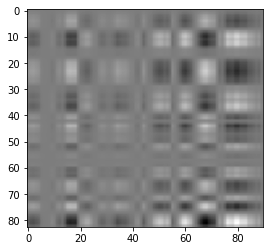

In [18]:
i = 6
plt.figure()
plt.imshow(np.outer(U_einstein[:,i], Vt_einstein[i]) * S_einstein[i], cmap="gray")

##### Does it look like anything? Try to use different value of $i$ to plot the image using the code provided above. **Discuss briefly with your group** what you think would happen when we add these $i$ "layers" together.

**Check your answers:**

Write a code snippet that adds the first 5 images generated from the outer products $\sigma_i {\bf u}_i  {\bf v}_i^T$ for $i \in \{0 \ldots 4\}$. 

Store this image as the 2d array `M`.

*Hint: Recall that a column vector multiplied by a row vector results in a matrix. When each ${\bf u}_i$ and ${\bf v}_i^T$ is stored as a 1d array, use [numpy.outer](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) to enact this outer product.*

In [27]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
num_images = 5  # number of images to add
M = np.outer(U_einstein[:,0], Vt_einstein[0]) * S_einstein[0]
for i in range(1, num_images):
    M += np.outer(U_einstein[:,i], Vt_einstein[i]) * S_einstein[i]

Plot the image resulting from this summation using `plt.imshow(M, cmap="gray")`.

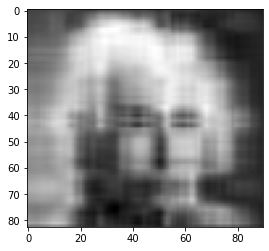

In [28]:
plt.imshow(M, cmap="gray")

We get an image that looks somewhat like our original starting image.  We can think of the SVD as breaking up our data into different "layers" or "parts" that get added together, and the $\sigma_i$ component determines how much of each component we add.  Here the matrix `M` is an approximation of the original matrix `einstein`.

<div class="alert alert-warning" role="alert">
    
**Answer this:** What is the rank of the approximated matrix that generates the image above? Think about the definition of matrix rank that you learned in class. You don't need to do any computation to get this result!
</div>

**Try this:**

Before moving on, try playing around with different values of `num_images` to see what sort of results you get.  Does the quality of the image scale linearly with the values of `num_images`? How does it change the rank of the matrix? Copy paste your code for generating `M` from above and try to change the value of `num_images` to see different results.

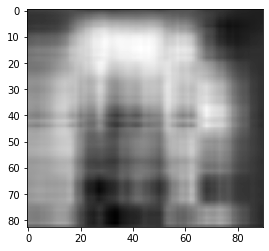

In [33]:
num_images = 3  # try some different values of it!
# paste your code for generating M here
M = np.outer(U_einstein[:,0], Vt_einstein[0]) * S_einstein[0]
for i in range(1, num_images):
    M += np.outer(U_einstein[:,i], Vt_einstein[i]) * S_einstein[i]
# plot the image
plt.imshow(M, cmap="gray")

The contribution of each "layer" is given by its respective singular value ($\sigma_i$), the entries of ${\bf \Sigma}$. Numpy's SVD function will automatically order the singular values in descending order for us.  Because of this, if we plot the singular values we can see that the first values give a much larger contribution in the form of broad details, and then later values give smaller, finer contributions to the image.

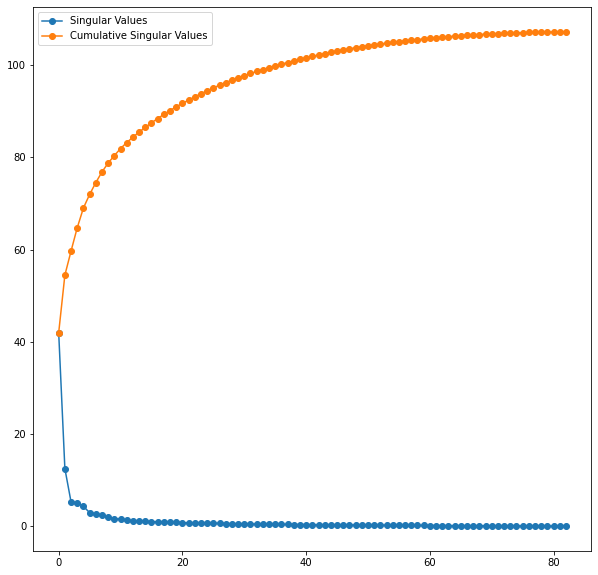

In [34]:
plt.figure(figsize=(10,10))
plt.plot(S_einstein, 'o-', label="Singular Values")
plt.plot(np.cumsum(S_einstein), 'o-', label="Cumulative Singular Values")
plt.legend()

**Check your answers:**

Intuitively, what should happen if we add every layer together?  Write a loop to add every layer together, and then plot the resulting image.  The number of "layers" or "components" to add will be given by the number of singular values ($\sigma$).

Store your result in variable `M_all`.

In [35]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
num_images = M.shape[0]  # try some different values of it!
# paste your code for generating M here
M_all = np.outer(U_einstein[:,0], Vt_einstein[0]) * S_einstein[0]
for i in range(1, num_images):
    M_all += np.outer(U_einstein[:,i], Vt_einstein[i]) * S_einstein[i]

Now you can plot the image:

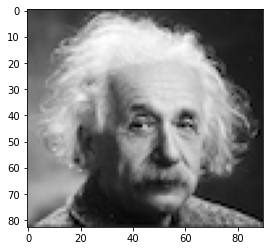

In [36]:
plt.imshow(M_all, cmap="gray")

## 2) SVD Least Squares

Because SVD allows us to decompose matrices of arbitrary size and rank, we are also able to use it in least squares applications.

Recall the least squares problem: find the vector ${\bf x}$ which minimizes $\left\lVert {\bf Ax} - \bf{y} \right\rVert^2$. Using the SVD component summation for ${\bf A}$ and since ${\bf U}$ is orthogonal, we can express the squares expression as:

$$
\left\lVert {\bf Ax} - \bf{y} \right\rVert^2 =
\sum_{i=1}^r \left(\sigma_i z_i - u^T_i y\right)^2
$$

where ${\bf z} = {\bf V}^T{\bf x}$, each $u^T_i$ is the $i^{th}$ row of ${\bf U}^T$ (i.e. the $i^{th}$ column of ${\bf U}$ as a row vector), and $r$ is the rank of ${\bf A}$ (the count of nonzero singular values).  By rearranging and minimizing the expression above over ${\bf x}$ (and thus over ${\bf z}$), we obtain the analytical solution for ${\bf z}$:
$$z_i = \frac{u^T_iy}{\sigma_i}$$ 
with non-zero $\sigma_i$. When $\sigma_i = 0$, ${\bf A}$ is rank-deficient and we set $z_i = 0$ so that the corresponding component does not contribute to the least squares solution.

Here we have a noisy dataset to which we would like to fit a curve. We will try using the above analysis to solve this least squares problem.

Text(0, 0.5, 'y')

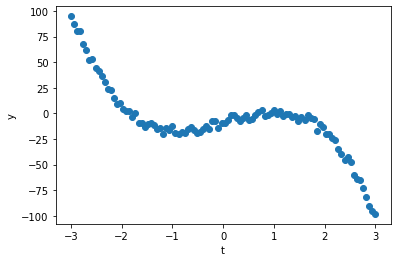

In [37]:
n = 100
t = np.linspace(-3, 3, n)
y = np.loadtxt('lstsq.txt')
plt.plot(t, y, 'o')
plt.xlabel('t')
plt.ylabel('y')

Fit the data using the following polynomial with degree 3:

$$ y = 1 x_0 + t x_1 + t^2 x_2 + t^3 x_3 $$

**Check your answers:**

Create the design matrix ${\bf A}$ to fit the cubic polynomial above. Store ${\bf A}$ aa a 2d array `A`.

*Hint: Recall that the $i^{th}$ column of the design matrix contains the coefficient multiplying $x_i$.*

In [42]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
A = np.ones((y.shape[0], 4))
A[:,1] = t
A[:,2] = t**2
A[:,3] = t**3

Compute the reduced SVD of ${\bf A}$:

In [45]:
U_lsq, S_lsq, Vt_lsq = la.svd(A, full_matrices=False)
print(U_lsq.shape)
print(S_lsq.shape)
print(Vt_lsq.shape)

(100, 4)
(4,)
(4, 4)


**Check your answers:**

Compute the vector ${\bf z}$ using the equation from above:
$$z_i = \frac{u^T_i y}{\sigma_i} .$$
Store ${\bf z}$ as a 1d array `z`.

*Hint: How do we determine the desired length of ${\bf z}$?*

*Hint: Recall that a row vector multiplied by a column vector results in a scalar. When $y$ and every $u^T_i$ are stored as 1d arrays, use [numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) to enact this dot/inner product. Usual matrix multiplication with the `@` symbol also works here.*

In [51]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
z = np.ones(S_lsq.shape)
for i in range(S_lsq.shape[0]):
    v = (np.dot(U_lsq.T[i], y))/(S_lsq[i])
    z[i] = v

**Check your answers:**

Now that we have the vector ${\bf z}$, compute the least squares solution ${\bf x}$ using the replacement equation from above: $${\bf z}={\bf V}^T{\bf x} . $$

Store ${\bf x}$ as a 1d array `x`.

*Hint: Try to avoid calling `numpy.linalg.inv` or `numpy.linalg.solve`. Since ${\bf V}^T$ is orthogonal, how can we efficiently compute its inverse?*

In [52]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
x = Vt_lsq.T@z

Here we plot your polynomial to confirm it fits the original data.

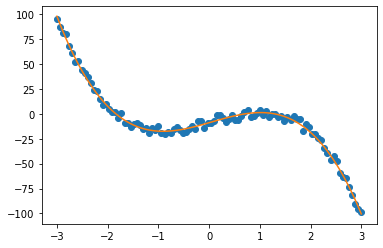

In [53]:
plt.plot(t, y, 'o')
plt.plot(t, A@x)

We can aggregate this procedure with ${\bf z}$ into a convenient matrix operator: the *pseudoinverse* of ${\bf A}$. We can rewrite the above in matrix form to derive a simple expression for the least squares solution ${\bf x}$ using the reduced SVD for ${\bf A}$:

$$z_i = \frac{u^T_iy}{\sigma_i} \implies {\bf z} = {\bf \Sigma}^{+} {\bf U}^T {\bf y} \implies {\bf x} = {\bf V \Sigma}^{+} {\bf U}^T {\bf y} \implies {\bf x} = {\bf A}^{+} {\bf y} . $$

Here, ${\bf A}^{+}$ is the *pseudoinverse* of ${\bf A}$. This always exists, regardless of the shape or rank of ${\bf A}$ (whereas ${\bf A}$ only has an inverse ${\bf A}^{-1}$ if it is square and full-rank). As indicated above, we have:

$$ {\bf A}^{+} = {\bf V\bf\Sigma}^{+}{\bf U}^T .$$

For the pseudoinverse ${\bf \Sigma}^+$, where ${\bf \Sigma}$ is a diagonal matrix, we define:
$$
\left( {\bf \Sigma}^{+} \right)_i = \begin{cases} 0 & \sigma_i = 0 \\ \frac{1}{\sigma_i} & \sigma_i \neq 0\end{cases}
$$
as we did above with the treatment of each $z_i$.

**Check your answers:**

Let's calculate the least squares solution above using the pseudoinverse of ${\bf A}$. You already have the reduced SVD of ${\bf A}$, so you now need to compute the pseudoinverse of the singular value matrix ${\bf \Sigma}$. 

Store ${\bf \Sigma}^+$ as a 2d array `S_pinv`.

*Hint: The function [numpy.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) easily constructs a square matrix from an array of elements composing the main diagonal.*

In [54]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
invdiag = np.ones(S_lsq.shape)
for i in range(S_lsq.shape[0]):
    k = S_lsq[i]
    if k == 0:
        invdiag[i] = 0
    else:
        invdiag[i] = 1.0/k
S_pinv = np.diag(invdiag)

**Check your answers:**

Form the pseudoinverse ${\bf A}^+$ of ${\bf A}$ using the definition ${\bf A}^+ = {\bf V\Sigma}^+{\bf U}^T$.

Store ${\bf A}^+$ as a 2d array `A_pinv`.

In [55]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
A_pinv = Vt_lsq.T@S_pinv@U_lsq.T

Now we may easily compute the least squares solution ${\bf x}$ using the equation ${\bf x} = {\bf A}^+{\bf y}$.

Plot the polynomial fit below; does this align with the earlier result?

(4, 100) (4,) (100, 4)


array([-8.90084321, 14.62746177,  0.85118499, -5.30274234])

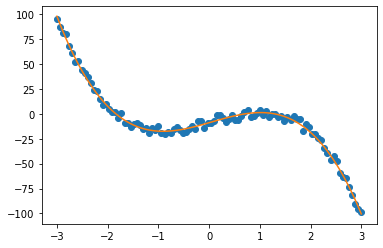

In [56]:
x_pinv = A_pinv @ y
print(A_pinv.shape, x_pinv.shape, A.shape)
plt.plot(t, y, 'o')
plt.plot(t, A@x_pinv)
x_pinv